In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Stock prices with change calculated")
df.head()

Date        Open        High         Low       Close  Trading Range  \
0  2007-01-02  117.940002  118.884003  117.279999  118.275002       1.604004   
1  2007-01-03  117.940002  119.818001  116.723000  119.341003       3.095001   
2  2007-01-04  119.827003  120.771004  116.737000  117.279999       4.034004   
3  2007-01-05  117.091003  118.681000  116.737000  117.383003       1.944000   
4  2007-01-08  117.827003  117.827003  113.888000  114.514999       3.939003   

     Change  Change Percentge  Trading Range Percentage  
0 -0.335000         -0.284043                  1.360017  
1 -1.401001         -1.187893                  2.624217  
2  2.547004          2.125568                  3.366523  
3 -0.292000         -0.249379                  1.660247  
4  3.312004          2.810904                  3.343039

In [4]:
df_for_clustering = df[["Change Percentage", "Trading Range Percentge"]]
df_for_clustering.head()

Change Percentge  Trading Range Percentage
0         -0.284043                  1.360017
1         -1.187893                  2.624217
2          2.125568                  3.366523
3         -0.249379                  1.660247
4          2.810904                  3.343039

In [15]:
df_for_clustering.dropna(inplace=True)
array_for_training = list(df_for_clustering.values)

/home/ak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
X = array_for_training

In [17]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5, random_state=0).fit(X)

In [18]:
model.labels_

array([0, 0, 4, ..., 4, 3, 0], dtype=int32)

In [20]:
model.predict([[-1.187893, 2.624217]])

array([0], dtype=int32)

In [21]:
from joblib import dump, load
dump(model, 'clustering.joblib')

['clustering.joblib']

In [22]:
df_for_plot = df_for_clustering.dropna()

In [27]:
df_for_plot.shape

(2845, 2)

In [28]:
model.labels_.shape

(2845,)

In [30]:
df_for_plot["Labels"] = model.labels_
df_for_plot.head()

Change Percentge  Trading Range Percentage  Labels
0         -0.284043                  1.360017       0
1         -1.187893                  2.624217       0
2          2.125568                  3.366523       4
3         -0.249379                  1.660247       0
4          2.810904                  3.343039       4

In [33]:
df_for_plot["Labels"].value_counts()

0    1389
4     708
3     502
1     177
2      69
Name: Labels, dtype: int64

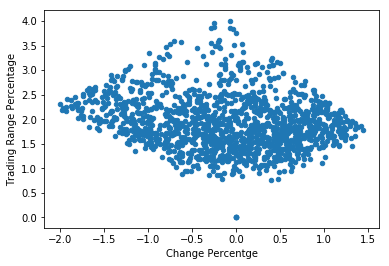

In [40]:
df_for_plot[df_for_plot["Labels"] == 0].plot(kind="scatter", x="Change Percentge", y="Trading Range Percentage")

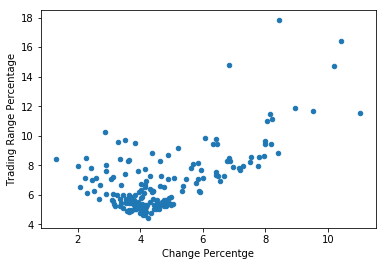

In [41]:
df_for_plot[df_for_plot["Labels"] == 1].plot(kind="scatter", x="Change Percentge", y="Trading Range Percentage")

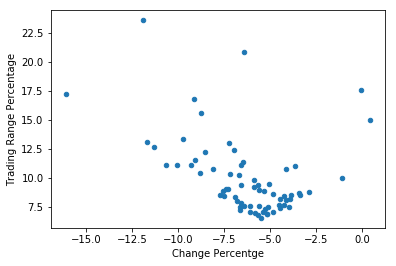

In [42]:
df_for_plot[df_for_plot["Labels"] == 2].plot(kind="scatter", x="Change Percentge", y="Trading Range Percentage")

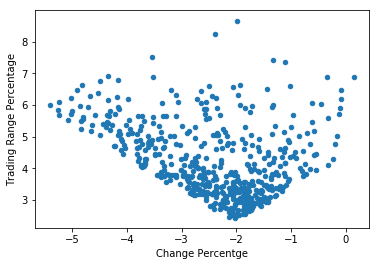

In [43]:
df_for_plot[df_for_plot["Labels"] == 3].plot(kind="scatter", x="Change Percentge", y="Trading Range Percentage")

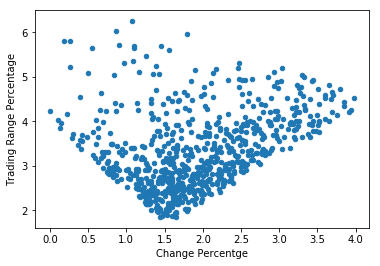

In [44]:
df_for_plot[df_for_plot["Labels"] == 4].plot(kind="scatter", x="Change Percentge", y="Trading Range Percentage")

Text(0,0.5,'Trading Range Percentage')

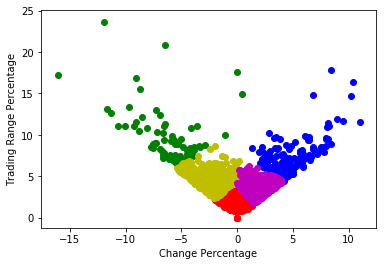

In [61]:
import matplotlib.pyplot as plt

red = df_for_plot[df_for_plot["Labels"] == 0]
x_red = red["Change Percentge"].values
y_red = red["Trading Range Percentage"].values
plt.scatter(x_red, y_red, c="r")

blue = df_for_plot[df_for_plot["Labels"] == 1]
x_blue = blue["Change Percentge"].values
y_blue = blue["Trading Range Percentage"].values
plt.scatter(x_blue, y_blue, c="b")

green = df_for_plot[df_for_plot["Labels"] == 2]
x_green = green["Change Percentge"].values
y_green = green["Trading Range Percentage"].values
plt.scatter(x_green, y_green, c="g")

yellow = df_for_plot[df_for_plot["Labels"] == 3]
x_yellow = yellow["Change Percentge"].values
y_yellow = yellow["Trading Range Percentage"].values
plt.scatter(x_yellow, y_yellow, c="y")

orange = df_for_plot[df_for_plot["Labels"] == 4]
x_orange = orange["Change Percentge"].values
y_orange = orange["Trading Range Percentage"].values
plt.scatter(x_orange, y_orange, c="m")

plt.xlabel("Change Percentage")
plt.ylabel("Trading Range Percentage")